Load libraries & Data set

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load dataset (if saved as CSV)
df = pd.read_csv("customer_data.csv")

# Display first few rows
print(df.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   56                 122                       1
1           2   46                  71                      16
2           3   32                  61                      61
3           4   60                  21                      64
4           5   25                  48                      63


Take only Annual Income and Spending Score

Data Preprocessing

In [6]:
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Find Optimal K Using Elbow Method (K-Means)

c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

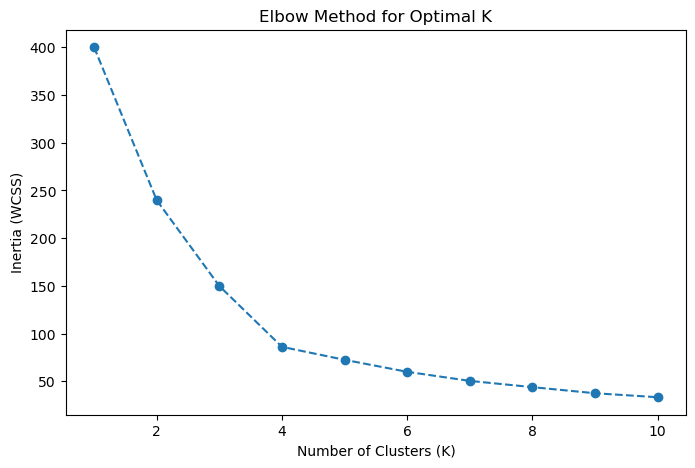

In [7]:
# Use the Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

Apply K-Means with Optimal K (K = 4)

In [8]:
# Apply K-Means with chosen K (e.g., 5)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df["KMeans_Cluster"] = clusters


c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualizing K-Means Clusters

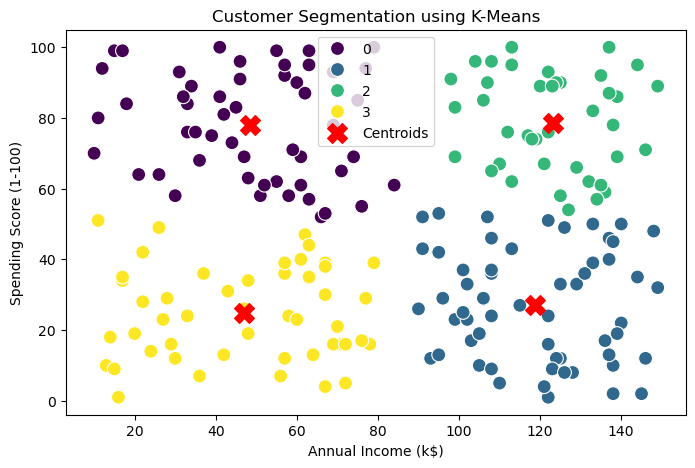

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["KMeans_Cluster"], palette="viridis", s=100)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0] * scaler.scale_[0] + scaler.mean_[0],  
            centers[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            c="red", marker="X", s=200, label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

Hierarchical clustering

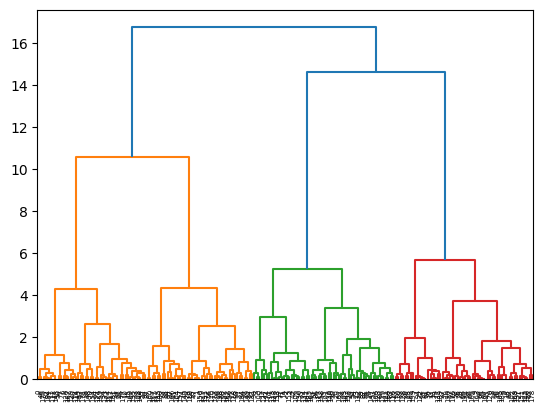

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
z = linkage(X_scaled, method="ward")
dendrogram(z)
plt.show()

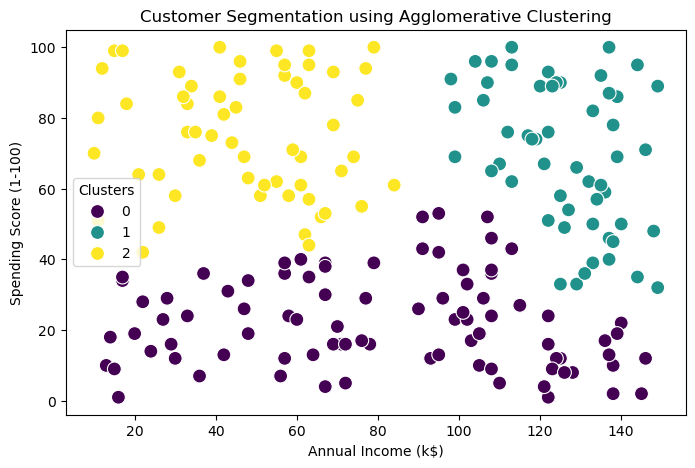

In [20]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = hc.fit_predict(X_scaled)

df["HC_Cluster"] = labels

# Scatter plot of the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["HC_Cluster"], palette="viridis", s=100)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using Agglomerative Clustering")
plt.legend(title="Clusters")
plt.show()

Take only Age and Spending score

Data preprocessing

In [26]:
# Select relevant features for clustering
Y = df[['Age', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(X)

c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

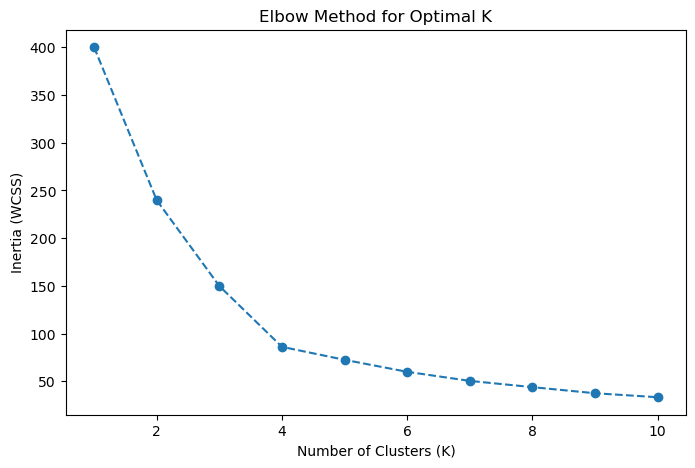

In [27]:
# Use the Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Y_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


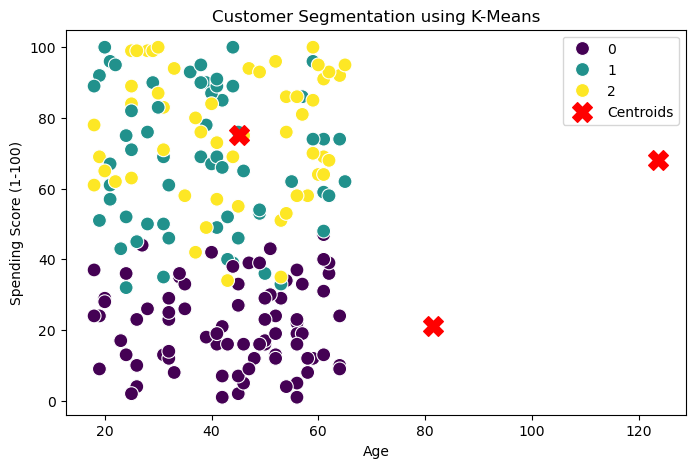

In [32]:
# Apply K-Means with chosen K (e.g., 5)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Y_scaled)

# Add cluster labels to dataset
df["KMeans_Cluster"] = clusters

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"], hue=df["KMeans_Cluster"], palette="viridis", s=100)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0] * scaler.scale_[0] + scaler.mean_[0],  
            centers[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            c="red", marker="X", s=200, label="Centroids")

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

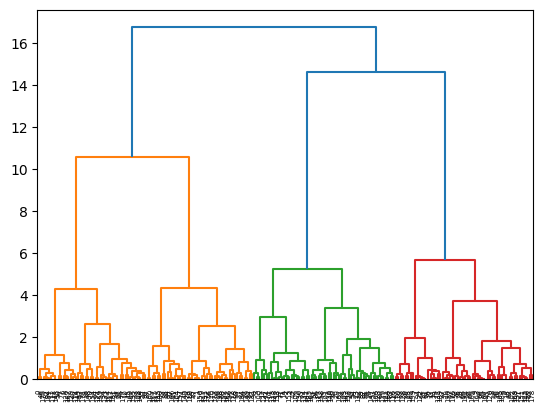

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
z = linkage(Y_scaled, method="ward")
dendrogram(z)
plt.show()

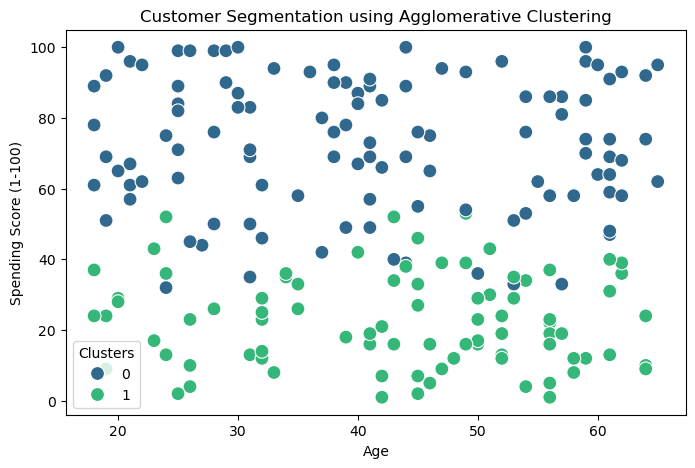

In [34]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels = hc.fit_predict(Y_scaled)

df["HC_Cluster"] = labels

# Scatter plot of the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"], hue=df["HC_Cluster"], palette="viridis", s=100)

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using Agglomerative Clustering")
plt.legend(title="Clusters")
plt.show()